# Assignment 10.1
**Due:** October 29th at 3:30pm


You are a quantitative geneticists studying virulence traits in the pathogenic  opportunistic pathogen, _Cryptococcus deneoformans_. Your collaborator on the project has given you a CSV file with both phenotype and genotype information for progeny from a cross. They have asked you to determine which of the three loci within the dataframe are associated with the variation in resistance to hydrogen peroxide. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

from matplotlib import pyplot as plt
%matplotlib inline

## Path to data
The data you will need for this assignment is listed on the class GIT under the path:

https://github.com/bio208fs-class/bio208fs-lecture/blob/master/data/H2O2_bio208_data.csv

## Linear regression & Heritability

In lecture, we introduced linear regression as a tool for examining the association between a genotype and phenotype (See slides 12 and 13). For the phenotype and genotype data listed in the file "H2O2_bio208_data.csv", under the _path_ on the class git, generate a genotype by phenotype plot (as shown on slides 12 and 13 of Thursdays quest lecture) per gene listed in the file (0.5 point). 

In [2]:
df = pd.read_csv("C:/Users/cleve/OneDrive/Documents/Notes/Notebooks Linked Materials/Duke University/Bio 208 Computing on the Genome/H2O2_bio208_data.csv")
df

,Strain,H2O2,SSK1,SSK2,RIC8
0,431,2.0,1.0,1.0,1.0
1,S1,0.5,0.0,0.0,1.0
2,S2,0.0,1.0,0.0,1.0
3,S3,4.0,0.0,1.0,1.0
4,S4,5.0,0.0,1.0,0.0
...,...,...,...,...,...
98,S98,5.0,1.0,0.0,0.0
99,S99,4.0,1.0,0.0,1.0
100,S100,4.0,1.0,1.0,1.0
101,S101,4.0,1.0,1.0,0.0


In [3]:
listH2O2 = df.H2O2.tolist()
listH2O2

[2.0,
 0.5,
 0.0,
 4.0,
 5.0,
 4.0,
 1.0,
 5.0,
 3.0,
 3.5,
 2.0,
 2.5,
 2.5,
 4.0,
 1.0,
 0.0,
 0.0,
 4.0,
 4.0,
 4.0,
 5.0,
 0.0,
 4.0,
 2.0,
 2.0,
 1.0,
 3.5,
 4.0,
 1.5,
 2.0,
 0.0,
 1.5,
 5.0,
 3.5,
 2.0,
 0.0,
 4.0,
 5.0,
 4.0,
 3.0,
 4.5,
 5.0,
 2.0,
 0.0,
 0.0,
 1.0,
 0.0,
 5.0,
 4.0,
 3.0,
 2.0,
 5.0,
 4.0,
 4.0,
 5.0,
 0.0,
 1.0,
 0.0,
 4.0,
 0.0,
 5.0,
 3.0,
 5.0,
 1.0,
 5.0,
 5.0,
 3.5,
 3.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.0,
 0.0,
 0.0,
 5.0,
 4.5,
 2.5,
 3.0,
 4.0,
 0.0,
 3.0,
 0.0,
 0.0,
 5.0,
 5.0,
 0.0,
 2.5,
 2.0,
 0.5,
 0.0,
 0.0,
 3.0,
 3.0,
 2.0,
 5.0,
 5.0,
 2.0,
 5.0,
 4.0,
 4.0,
 4.0,
 4.0]

In [4]:
#SSK1 genotype by phenotype plot

In [5]:
listSSK1 = df.SSK1.tolist()
listSSK1

[1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0]

In [6]:
zero = 0
zeropointfive = 0
one = 0
onepointfive = 0
two = 0
twopointfive = 0
three = 0
threepointfive = 0
four = 0
fourpointfive = 0
five = 0
N = 0

for i in listH2O2:
    if(i == 0):
        zero += 1
    if(i == 0.5):
        zeropointfive += 1
    if(i == 1):
        one += 1
    if(i == 1.5):
        onepointfive += 1
    if(i == 2):
        two += 1
    if(i == 2.5):
        twopointfive += 1
    if(i == 3):
        three += 1
    if(i == 3.5):
        threepointfive += 1
    if(i == 4):
        four += 1
    if(i == 4.5):
        fourpointfive += 1
    if(i == 5):
        five += 1
    N+=1
print(zero, zeropointfive, one, onepointfive, two, twopointfive, three, threepointfive, four, fourpointfive, five, N)

24 2 6 2 12 4 9 4 19 2 19 103


In [7]:
phenotypes = np.concatenate([0*np.ones(zero), 0.5*np.ones(zeropointfive), 1*np.ones(one), 1.5*np.ones(onepointfive), 2*np.ones(two), 2.5*np.ones(twopointfive), 3*np.ones(three), 3.5*np.ones(threepointfive), 4*np.ones(four), 4.5*np.ones(fourpointfive), 5*np.ones(five)])
phenotypes.shape[0]

103

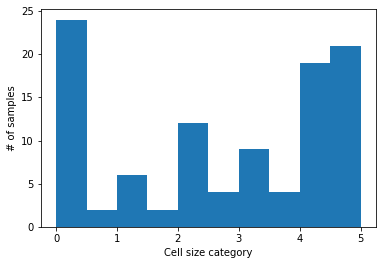

In [8]:
plt.hist(phenotypes)
plt.ylabel("# of samples");
plt.xlabel("Cell size category");

In [9]:
zeros = 0
ones = 0
for i in listSSK1:
    if(i == 0):
        zeros+=1
    if(i == 1):
        ones+=1

In [10]:
genotypes = np.concatenate([np.zeros(zeros),np.ones(ones)])
genotypes.shape[0]

103

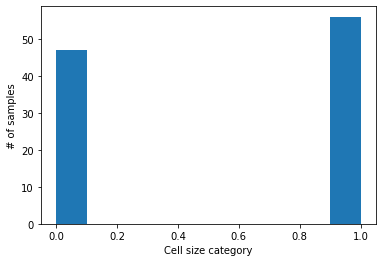

In [11]:
plt.hist(genotypes)
plt.ylabel("# of samples");
plt.xlabel("Cell size category");

In [12]:
celldf = pd.DataFrame([phenotypes,genotypes]).T
celldf.columns = ['Phenotype','Genotype']
celldf.shape

(103, 2)

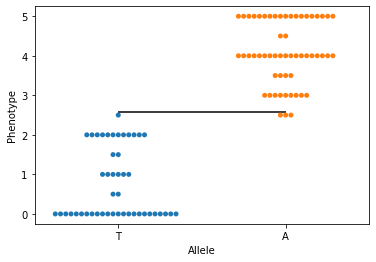

In [13]:
sns.swarmplot(y='Phenotype',x='Genotype',data=celldf);
plt.xlabel('Allele');
plt.xticks([0,1],['T','A']);
plt.hlines(celldf.Phenotype.mean(),0,1,color='k'); 

In [14]:
resSSK1 = smf.ols(formula='Phenotype ~ Genotype',data=celldf).fit()
resSSK1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Phenotype   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     387.0
Date:                Sun, 25 Oct 2020   Prob (F-statistic):           2.52e-36
Time:                        21:49:46   Log-Likelihood:                -128.27
No. Observations:                 103   AIC:                             260.5
Df Residuals:                     101   BIC:                             265.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7766      0.124      6.271      0.000       0.531       1.022
Genotype       3.3038      0.168     19.672      0.000       2.971       3.637
==============================================================================
Omnibus:                       44.678   Durbin-Watson:                   0.184
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                6.956
Skew:                           0.124   Prob(JB):                       0.0309
Kurtosis:                       1.751   Cond. No.                         2.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
#SSK2 genotype by phenotype plot

In [16]:
listSSK2 = df.SSK2.tolist()
listSSK2

[1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0]

In [17]:
zeros = 0
ones = 0
for i in listSSK2:
    if(i == 0):
        zeros+=1
    if(i == 1):
        ones+=1

In [18]:
genotypes = np.concatenate([np.zeros(zeros),np.ones(ones)])
genotypes.shape[0]

103

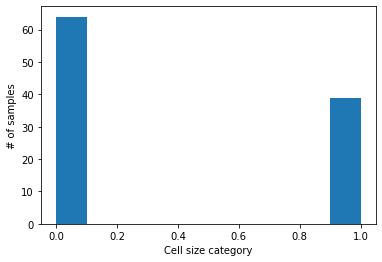

In [19]:
plt.hist(genotypes)
plt.ylabel("# of samples");
plt.xlabel("Cell size category");

In [20]:
celldf = pd.DataFrame([phenotypes,genotypes]).T
celldf.columns = ['Phenotype','Genotype']
celldf.shape

(103, 2)

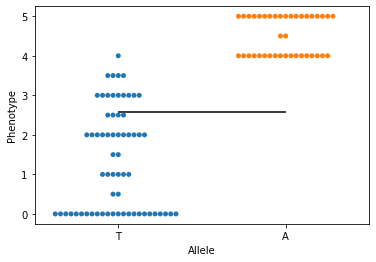

In [21]:
sns.swarmplot(y='Phenotype',x='Genotype',data=celldf);
plt.xlabel('Allele');
plt.xticks([0,1],['T','A']);
plt.hlines(celldf.Phenotype.mean(),0,1,color='k'); 

In [22]:
resSSK2 = smf.ols(formula='Phenotype ~ Genotype',data=celldf).fit()
resSSK2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Phenotype   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     206.6
Date:                Sun, 25 Oct 2020   Prob (F-statistic):           3.61e-26
Time:                        21:49:47   Log-Likelihood:                -152.04
No. Observations:                 103   AIC:                             308.1
Df Residuals:                     101   BIC:                             313.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3906      0.134     10.404      0.000       1.125       1.656
Genotype       3.1222      0.217     14.374      0.000       2.691       3.553
==============================================================================
Omnibus:                        7.086   Durbin-Watson:                   0.106
Prob(Omnibus):                  0.029   Jarque-Bera (JB):                3.991
Skew:                           0.282   Prob(JB):                        0.136
Kurtosis:                       2.218   Cond. No.                         2.43
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
#RIC8 genotype by phenotype plot

In [24]:
listRIC8 = df.RIC8.tolist()
listRIC8

[1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0]

In [25]:
zeros = 0
ones = 0
for i in listRIC8:
    if(i == 0):
        zeros+=1
    if(i == 1):
        ones+=1

In [26]:
genotypes = np.concatenate([np.zeros(zeros),np.ones(ones)])
genotypes.shape[0]

103

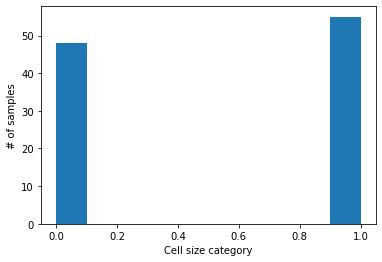

In [27]:
plt.hist(genotypes)
plt.ylabel("# of samples");
plt.xlabel("Cell size category");

In [28]:
celldf = pd.DataFrame([phenotypes,genotypes]).T
celldf.columns = ['Phenotype','Genotype']
celldf.shape

(103, 2)

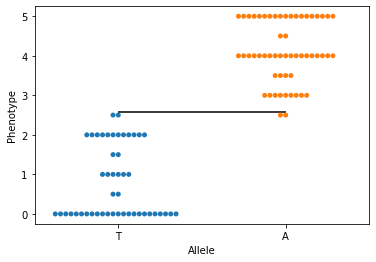

In [29]:
sns.swarmplot(y='Phenotype',x='Genotype',data=celldf);
plt.xlabel('Allele');
plt.xticks([0,1],['T','A']);
plt.hlines(celldf.Phenotype.mean(),0,1,color='k'); 

In [30]:
resRIC8 = smf.ols(formula='Phenotype ~ Genotype',data=celldf).fit()
resRIC8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Phenotype   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     384.6
Date:                Sun, 25 Oct 2020   Prob (F-statistic):           3.25e-36
Time:                        21:49:48   Log-Likelihood:                -128.53
No. Observations:                 103   AIC:                             261.1
Df Residuals:                     101   BIC:                             266.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8125      0.123      6.614      0.000       0.569       1.056
Genotype       3.2966      0.168     19.610      0.000       2.963       3.630
==============================================================================
Omnibus:                       46.499   Durbin-Watson:                   0.183
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.178
Skew:                           0.154   Prob(JB):                       0.0276
Kurtosis:                       1.744   Cond. No.                         2.71
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Also, for each gene listed in this file, estimate the heritability (r-squared value) and report your hypothesis regarding the potentially association between variation in H2O2 tolerance and the gene (0.5 points). 

In [31]:
resSSK1.rsquared

0.7930285914022426

In [32]:
resSSK2.rsquared

0.6716613885635878

In [33]:
resRIC8.rsquared

0.7919899154412825

Hypothesis: Within the lineages of Cryptococcus, there is variation between H2O2 tolerance and the gene. Overall, SSK1, SSK2, and RIC8 are fairly effective at tolerating H2O2. 

There are allelic states reported for three genes in the H2O2_bio208_data.csv file - _SSK1, SSK2, and RIC8_. The genotypes are scored as zero if inherited from a parental strain named XL280**a** or one if inherited from the strain 431. You will be rewarded points for each gene (Totaling 3 points).  

### Notes on the data

The data should have five columns, named Strain, H2O2, SSK1, SSK2, and RIC8. The Strain column is the name of the progeny or isolate. The H2O2 column consists of phenotypic  ordinal scores between 0 - 5 for colony growth when grown on media containing hydrogen peroxide. The loci at the genes SSK1, SSK2, and RIC8 are coded as 0 or 1 for allelic states per offspring inherited from the parental strains XL280a or 431 respectively. For more details please refer to [_Roth et al._](https://www.biorxiv.org/content/10.1101/2020.08.21.259861v1.full)